# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

In [1]:
# Paying customer

#### 2. What are the predictors/covariates? 

Answer: 

In [2]:
# demographic data (age, gender, location, profession) 
# & usage (days since last log in, activity) & time

#### 3. What timeframe is this data relevent for?

Answer: 

In [3]:
# Jan-Apr 2015

#### 4. What is the hypothesis?

Answer: 

In [4]:
# that more frequent users / active users are more likely to convert to paying

## Let's get started with the ADMISSIONS dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
admit | 1 = admit 0 = reject | categorical
gre | gre for student x | continuous
gpa | grade point average for student x | continuous
rank | class rank, integer | categorical


We would like to explore the variables that explain whether a student gets admitted or not.

#### 2. What is the outcome?

We are trying to predict admission (dependent variable). Students can be admitted or rejected. Admit = 1, not admit = 0.

#### 3. What are the predictors/covariates? 

gre, gpa, rank

GRE is a standardized test.
GPA is the grade point average.
RANK is academic prestige. 

#### 4. What timeframe is this data relevent for?

this is not specified although it is clear that we've taken a snapshot in time.

#### 4. What is the hypothesis?

A stronger GPA, GRE, and Rank will increase the likelihood of admission.

    Using the above information, write a well-formed problem statement. 

Problem Statement

Determine which students will be admitted to UCLA, using high school performance (GPA, Class Rank) and standardized testing (GRE) data.

## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Identify what we are looking at as an introduction to our dataset.

Ask if the dataset we are given will help us answer the problem.

Understand how the data is distributed.

Determine if any parsing / cleaning of the data is required.

It can include graphical representation of the data (histograms etc) or be stastistical.

Begin to suggest hypothesis as well as identify any sources of bias.

Identify trends and outliers.

Select optimal statistical method for dataset we are evaluting.

Apply descriptive and inferential statistics.

Develop framework for Data Analysis / Modelling.

#### 2a. What are the assumptions of the distribution of data? 

Categorical Variables
admit is a 0 or a 1
rank has discreet values ranging from 1 to 4 

Continuous variables are normally distributed
gre is treated as a continuous variable (although I recognize that it is an integer rather than decimal)
gpa is a continous variable ranging from 


In [5]:
import pandas as pd
import numpy as np
import pylab as pl
import statsmodels.api as sm
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# read the data

df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")

print df.head()
print df.describe()

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4
            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


#### 2b. How will you determine the distribution of your data? 

Using pandas, we can display the data in histogram format.

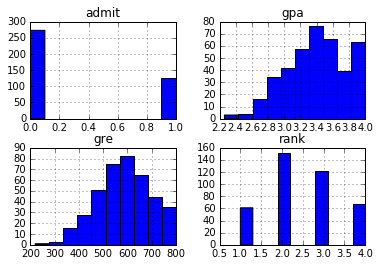

In [6]:
df.hist()
pl.show()

#### 3a. How might outliers impact your analysis? 

It can shift the mean dramatically.

In [25]:
df.skew()

admit    0.787051
gre     -0.144357
gpa     -0.208698
rank     0.097223
dtype: float64

#### 3b. How will you test for outliers? 

Looking at the distribution output in table or 

Table form: df.describe gives us the quartiles?
Graphical form: We could use boxplot which give us a graphical look?


Axes(0.125,0.125;0.775x0.775)


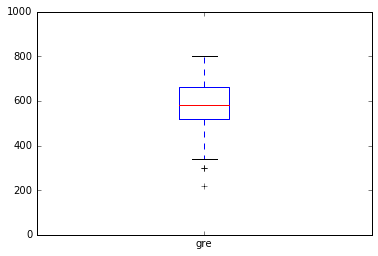

In [24]:
print df['gre'].plot(kind='box',ylim=(0,1000))

#### 4a. What is colinearity? 

Colinearity occurs when two independent variables are highly correlated. 
The result from highly correlated independent variables is that there is little/no incremental predicting power (in a linear regression, for example)

#### 4b. How will you test for colinearity? 

You could run a correlation matrix like below. High correlations in the matrix would point to colinearity.

In [22]:
print df.corr()

          admit       gre       gpa      rank
admit  1.000000  0.184434  0.178212 -0.242513
gre    0.184434  1.000000  0.384266 -0.123447
gpa    0.178212  0.384266  1.000000 -0.057461
rank  -0.242513 -0.123447 -0.057461  1.000000


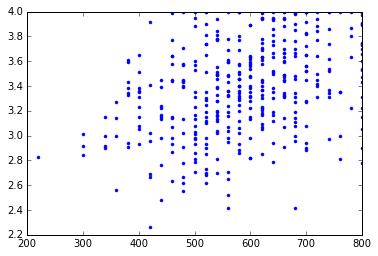

In [30]:
# furhter exploration, does GRE/GPA predict one another?

plt.plot(df.gre,df.gpa,'.')

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Read the data dictionary.

Filter, Sort and Simply Visualize the Data.

Explore variables and data types.

- Use df.describe to get ranges, mean, stdv, count
- Use df.head to look at the first few lines of data
- Use df.hist to see the histogram

Assess preliminary outliers, trends.
- Quintile analysis using df.quintile or df.describe
- Use boxplots to check the quintiles

Identify data quality / data gaps
- Check for missing values with np.isnull()

Preliminary Statistics
- Transform categorical variables using dummies (like "rank")
- Look at the skew and shape of the distribution
- Run some basic plots, like plt.plot 

Create a repository with all of the data, definitions, descriptions, and techniques so that the analysis could be reproduced.


## Bonus Questions:
1. Outline your analysis method for predicting your outcome
- Once data has been transformed using dummies, begin to run regressions for best fit 
- Use stats package like statsmodel logit to run a multiple least squares fit 
2. Write an alternative problem statement for your dataset
- Determine to what extent qualitative factors influence admission rates.
3. Articulate the assumptions and risks of the alternative model
- We do not have the data, only the error term from the multiple fit that perhaps describes the "qualitative" component to the application.